In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from random import seed, shuffle
import os

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
sns.set_theme(style="white")

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.cluster import KMeans, SpectralClustering

from scipy.spatial.distance import directed_hausdorff, euclidean, cosine, pdist
from scipy import stats
from sklearn.preprocessing import StandardScaler


from src.downsample import downsamp_audio
import src.dimension_reducer as dr
import src.distance_metrics as dm
import src.plotting as plotting
import src.emb_manipulator as em


from IPython.display import clear_output

import warnings
warnings.filterwarnings('ignore')

#Directory where already-generated embeddings stored
embedding_dir = '/Users/rahulbrito/Documents/projects/infantvoice/data/embeddings'

file = '03016_diarized_pyv2.csv'
emb = pd.read_csv(os.path.join(embedding_dir,file), index_col=0)
emb_down_unscaled = em.resample_data(emb,1)

#average emebdding for each participant
emb_a = em.embedding_averager(emb_down_unscaled)

#egemap (88 features) for each participant
gemap_file = '040122_segmented_postpartum_moms_gemaps_2sec.csv'
gemap_unscaled = pd.read_csv(os.path.join(embedding_dir,gemap_file), index_col=0)
gemap_unscaled = gemap_unscaled.drop(columns=['start','end'])


scaler = StandardScaler()
emb_down = pd.DataFrame(scaler.fit_transform(emb_down_unscaled.drop(columns='part_id')))
emb_down['part_id'] = emb_down_unscaled.part_id.to_numpy()

gemap = pd.DataFrame(scaler.fit_transform(gemap_unscaled.drop(columns='part_id')))
gemap['part_id'] = gemap_unscaled.part_id.to_numpy()

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [55]:
gemap_unscaled

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp,part_id
file,,,,,,,,,,,,,,,,,,,,,
/Users/rahulbrito/Documents/projects/infantvoice/data/Full_Readings/0300222_recordings_040122_segmented_2sec/20/part20_62594_69141.wav,36.827510,0.189025,32.323870,35.654537,38.819790,6.495918,115.251860,93.735150,171.785750,187.910570,...,-0.016354,0.058350,2.603369,2.314815,0.300000,0.222351,0.147273,0.142707,-22.450348,20
/Users/rahulbrito/Documents/projects/infantvoice/data/Full_Readings/0300222_recordings_040122_segmented_2sec/20/part20_455511_459477.wav,35.593746,0.173865,31.247574,37.117070,39.677265,8.429691,101.108185,100.535614,59.250328,32.852590,...,-0.025285,0.133956,4.556962,2.564103,0.229000,0.121033,0.127273,0.100643,-23.880350,20
/Users/rahulbrito/Documents/projects/infantvoice/data/Full_Readings/0300222_recordings_040122_segmented_2sec/20/part20_128288_130752.wav,35.023060,0.180337,32.257990,33.818260,41.624610,9.366619,221.781620,177.272190,111.909920,38.646626,...,-0.038326,0.325142,6.122449,3.781513,0.161111,0.090240,0.092500,0.039922,-24.893398,20
/Users/rahulbrito/Documents/projects/infantvoice/data/Full_Readings/0300222_recordings_040122_segmented_2sec/20/part20_429135_433084.wav,40.012096,0.107107,36.700813,40.485447,42.985996,6.285183,46.455284,29.092266,124.857660,205.349180,...,-0.036983,0.224328,4.580153,2.061856,0.367500,0.450326,0.107143,0.056496,-21.201351,20
/Users/rahulbrito/Documents/projects/infantvoice/data/Full_Readings/0300222_recordings_040122_segmented_2sec/20/part20_416175_420884.wav,38.929490,0.138833,34.591698,38.123250,41.487488,6.895790,265.779140,307.211520,36.829338,40.691830,...,-0.018409,0.137551,4.477612,2.370690,0.312727,0.149733,0.080833,0.093849,-22.604933,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/Users/rahulbrito/Documents/projects/infantvoice/data/Full_Readings/0300222_recordings_040122_segmented_2sec/14/part14_124829_127191.wav,32.290363,0.081596,29.820541,32.613480,34.230614,4.410072,14.574787,13.724978,211.575380,182.345200,...,0.005857,0.084004,3.829788,2.173913,0.256000,0.034409,0.151667,0.112163,-27.902973,14
/Users/rahulbrito/Documents/projects/infantvoice/data/Full_Readings/0300222_recordings_040122_segmented_2sec/14/part14_219329_221387.wav,32.571033,0.153465,29.283726,31.806461,35.896812,6.613087,63.566685,74.932830,54.982952,19.853626,...,0.005728,0.125768,3.921569,3.015075,0.181667,0.072438,0.126667,0.073409,-27.421041,14
/Users/rahulbrito/Documents/projects/infantvoice/data/Full_Readings/0300222_recordings_040122_segmented_2sec/14/part14_306049_308429.wav,32.669500,0.166152,28.984583,31.308430,35.613647,6.629065,382.830840,261.658050,26.893383,13.323334,...,0.006152,0.059831,4.237289,1.739130,0.395000,0.297867,0.206667,0.194822,-28.530626,14


In [3]:
#average emebdding for each participant
emb_a = em.embedding_averager(emb_down)
cos_dist_high_dim = dm.cos_distance(emb_a)

Processing row 19, col 19


In [4]:
emb_down_kmeans = emb_down
emb_down_kmeans['kmeans_predict'] = KMeans(n_clusters=20, random_state=42).fit_predict(emb_down.drop(columns='part_id'))

In [59]:
true_group = emb_down_kmeans.groupby('part_id')

count = {}
for name, embeddings in true_group:
    if (embeddings['kmeans_predict'].to_numpy()[0] == embeddings['kmeans_predict']).all():
        #print(embeddings['kmeans_predict'] == embeddings['kmeans_predict'].iloc[0])
        count[name] = True
    else:
        tot = sum(embeddings['kmeans_predict'].to_numpy()[0] == embeddings['kmeans_predict'])/embeddings['kmeans_predict'].shape[0]
        count[name] = tot

In [60]:
count

{1.0: True,
 2.0: 0.7884615384615384,
 3.0: True,
 4.0: True,
 5.0: 0.9523809523809523,
 6.0: 0.7638888888888888,
 7.0: 0.975,
 8.0: True,
 9.0: 0.9701492537313433,
 10.0: 0.9696969696969697,
 11.0: 0.9387755102040817,
 12.0: 0.25925925925925924,
 13.0: True,
 14.0: True,
 15.0: 0.9767441860465116,
 16.0: 0.84,
 17.0: 0.6875,
 18.0: True,
 19.0: True,
 20.0: True}

<AxesSubplot:>

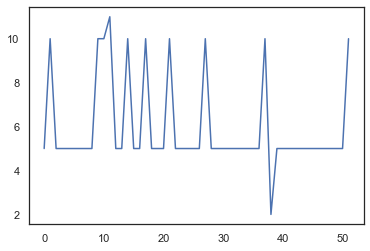

In [54]:
a = emb_down_kmeans[emb_down_kmeans.part_id==2][['kmeans_predict']]
sns.lineplot(x = np.arange(a.shape[0]), y = a.values.flatten())

In [57]:
#max global structure
perplexity = 135
learning_rate = 200

#default
#n_neighbors = 10
#dist=0.1

#max global structure
n_neighbors=14
dist=10E-3

###Run dimension reduction with different methods on the embeddings to establish a baseline before leaving any participants out
#Using tsne with perplexity=30 (default) since N/100<30, and learning rate of n/12. Random seed is 42 so the result is the same each time
emb_tsne = dr.run_tsne(emb_down, perplexity = perplexity, init='pca', learning_rate=learning_rate)

#run umap with default parameters
emb_umap = dr.run_umap(emb_down, n_neighbors=n_neighbors, dist=dist)


labels = emb_down.part_id

#PACMAP for comparison
emb_pacmap = dr.run_pacmap(emb_down)


#PCA for comparison
pca = PCA(n_components=512)
#exp_var = pca.fit(emb_down.drop(columns='part_id')).explained_variance_ratio_
emb_pca = pd.DataFrame(pca.fit_transform(emb_down.drop(columns='part_id')))
emb_pca = emb_pca.iloc[:,:2]
emb_pca.columns = ['dim0', 'dim1']

#measure 'knn', 'knc', 'cpd' to determine how well micro, meso, and marco structure of high-D preserved by dim reduction, per Kobak&Berens2019
knn=50
knn_classes=4
subsetsize=700

#we are always comparing to emb_down as our high-dimension embedding. 
high_dim = emb_down.drop(columns='part_id').to_numpy()
classes= emb_down.part_id.to_numpy() #extract the categories/labels

#compare tsne to embeddings
low_dim = emb_tsne.drop(columns='part_id').to_numpy()
dist_tsne = dm.embedding_quality(high_dim, low_dim, classes, knn=knn, knn_classes=knn_classes, subsetsize=subsetsize)

#compare umap to embeddings
low_dim = emb_umap.drop(columns='part_id').to_numpy()
dist_umap = dm.embedding_quality(high_dim, low_dim, classes, knn=knn, knn_classes=knn_classes, subsetsize=subsetsize)

#comapre pacmap to embeddings
low_dim = emb_pacmap.to_numpy()
dist_pacmap = dm.embedding_quality(high_dim, low_dim, classes,  knn=knn,  knn_classes=knn_classes, subsetsize=subsetsize)

#compare pca to embeddings
low_dim = emb_pca.to_numpy()
dist_pca = dm.embedding_quality(high_dim, low_dim, classes,  knn=knn,  knn_classes=knn_classes, subsetsize=subsetsize)

#create a dataframe of all distance metrics for each dimension method
dist = pd.DataFrame(np.vstack((dist_tsne, dist_umap,dist_pacmap,dist_pca)), columns = ['micro', 'meso', 'macro'], index = ['tsne', 'umap', 'pacmap','pca'])
dist = dist.round(decimals=3)

[Text(0.5, 1.0, 'labeled by participant ID\n      micro   meso  macro\numap  0.623  0.438  0.421')]

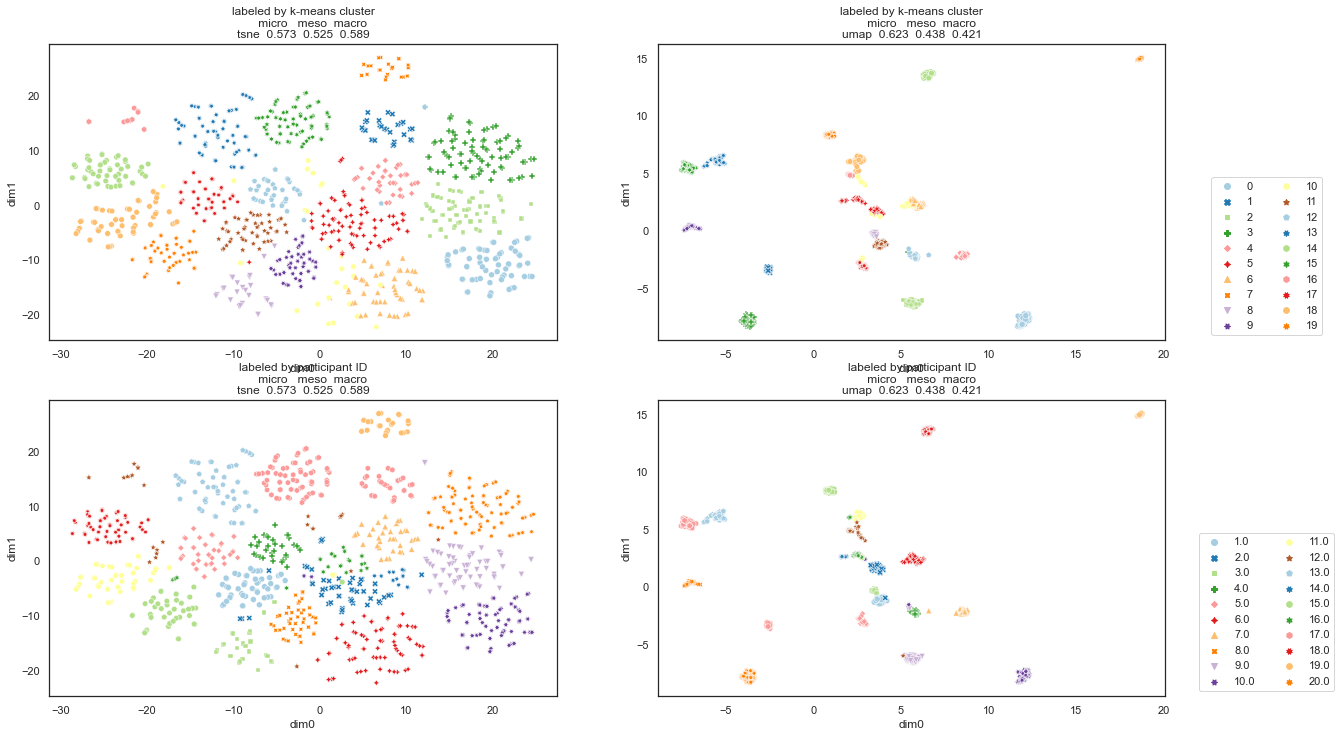

In [61]:
##plot 2 dimensions from each dimension reduction
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(20,12))

clust_plt_tsne = sns.scatterplot(x=emb_tsne.dim0, y=emb_tsne.dim1, ax=ax1, palette="Paired", hue=emb_down_kmeans.kmeans_predict, style=emb_down_kmeans.kmeans_predict, legend=False)
#ax1.legend(loc="lower center",bbox_to_anchor=(1.3,1), ncol=2)
clust_plt_tsne.set(title = 'labeled by k-means cluster\n' + str(dist[dist.index=='tsne']))

clust_plt_umap = sns.scatterplot(x=emb_umap.dim0, y=emb_umap.dim1, ax=ax2, palette="Paired", hue=emb_down_kmeans.kmeans_predict,style=emb_down_kmeans.kmeans_predict, legend=True)
ax2.legend(loc="lower center",bbox_to_anchor=(1.2, 0), ncol=2)
clust_plt_umap.set(title = 'labeled by k-means cluster\n' + str(dist[dist.index=='umap']))

clust_plt_tsne_2 = sns.scatterplot(x=emb_tsne.dim0, y=emb_tsne.dim1, ax=ax3, palette="Paired", hue=emb_tsne.part_id, style=emb_tsne.part_id, legend=False)
#ax1.legend(loc="lower center",bbox_to_anchor=(1.3,1), ncol=2)
clust_plt_tsne_2.set(title = 'labeled by participant ID\n' + str(dist[dist.index=='tsne']))

clust_plt_umap_2 = sns.scatterplot(x=emb_umap.dim0, y=emb_umap.dim1, ax=ax4, palette="Paired", hue=emb_umap.part_id, style=emb_tsne.part_id, legend=True)
ax4.legend(loc="lower center",bbox_to_anchor=(1.2, 0), ncol=2)
clust_plt_umap_2.set(title = 'labeled by participant ID\n' + str(dist[dist.index=='umap']))

[Text(0.5, 1.0, '     micro  meso  macro\npca  0.423  0.55  0.481')]

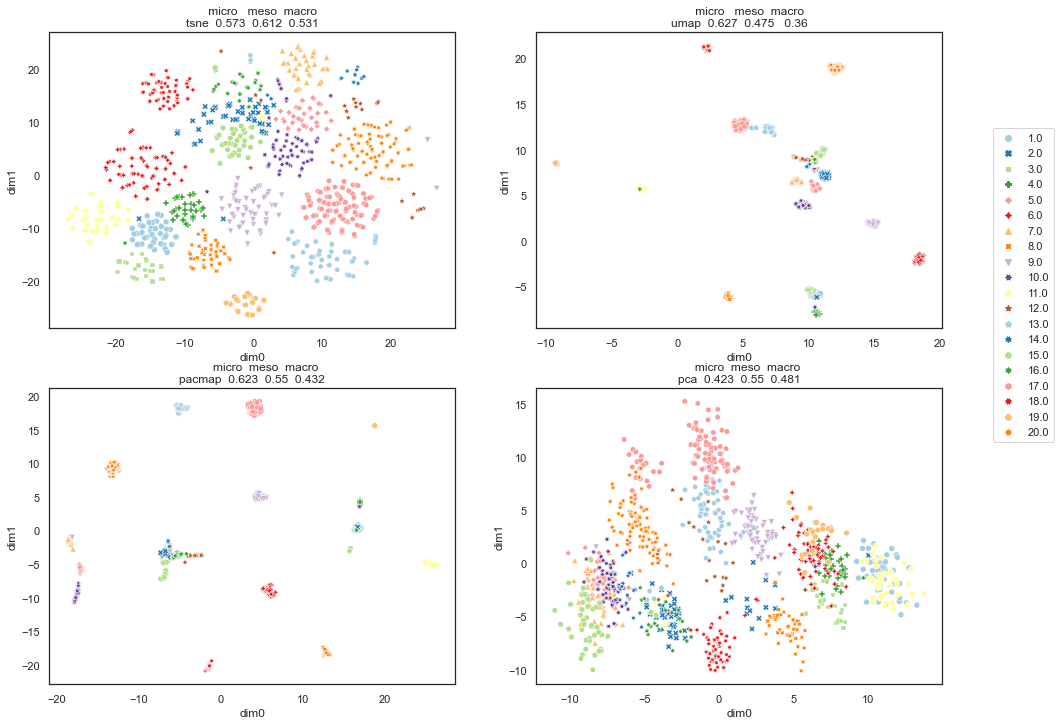

In [3]:
#construct dictonary of leaving each participant
part_list = emb_a.part_id.unique().astype('int32') 

#loo is leave one out. Creates a dictionary of the downsampled embeddings with the format: {participant_removed:embeddings} for each participant
loo = {p:
       emb_a[emb_a.part_id!=part_list[idx]].reset_index(drop=True) 
       for idx,p in enumerate(part_list)
      }

loo_cos_dist = {rm:dm.cos_distance(e_a) for rm, e_a in loo.items()}

Processing row 18, col 18


In [5]:
for p in loo_cos_dist.keys():  
    loo_cos_dist[p].loc[p] = np.nan
    loo_cos_dist[p].sort_index(inplace=True)
    loo_cos_dist[p][p] = np.nan
    loo_cos_dist[p] = loo_cos_dist[p].reindex(sorted(loo_cos_dist[p].columns), axis=1)


In [8]:
flat_loss_cos_dist = {rm:pd.DataFrame(h.to_numpy().flatten()) for rm, h in loo_cos_dist.items()}

In [12]:
corr_coeff = pd.DataFrame()
df1 = pd.DataFrame(cos_dist_high_dim.to_numpy().flatten())
for haus in flat_loss_cos_dist.values():
    #haus = pd.DataFrame(haus)
    corr_coeff = pd.concat([corr_coeff, df1.corrwith(haus)], ignore_index=True)
corr_coeff['rm'] = flat_loss_cos_dist.keys()

ValueError: Data must be 1-dimensional

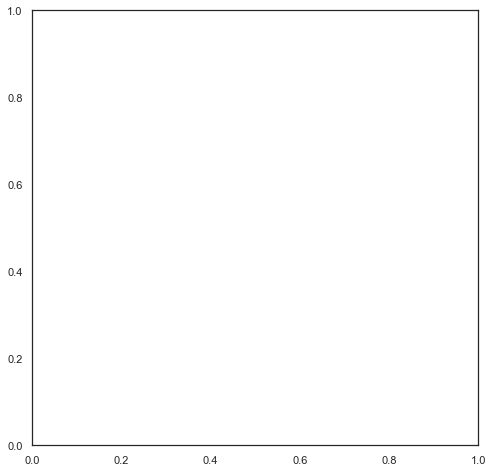

In [18]:
fig, ax = plt.subplots(figsize=(8,8))
[sns.scatterplot(
    x=df1.to_numpy(), y=dist.to_numpy(), palette="Paired", 
    ) 
 for dist in flat_loss_cos_dist.values()]

plt.xlim([-3,3])
plt.ylim([-3,3])

sns.lineplot(x=[-3,3], y=[-3,3])
plt.show()